# Machine Learning lab 2 - K-means

## Exercise 1 - K-means from scratch

In this exercise, the task would be to implement simple k-means algorithm from scratch

### Steps:
  1. Specify number of clusters *K*
  2. initialize centroids
  3. calculate distance from centroids to all points in datasets
  4. assign datapoints to the closest centroids
  5. compute new controids to the clusters by taking the average of the all data points that belong to each cluster
  6. repeat steps 2-5. until there is no change in centroids 

In [19]:
import matplotlib.pyplot as plt
import copy
import numpy as np
from numpy.linalg import norm
from sklearn.cluster import KMeans

### 0. Generate dataset

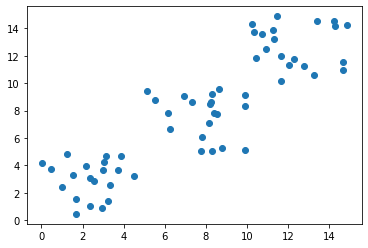

In [64]:
def split_points(points: np.array, n_of_point_groups: int) -> np.array:
    changed_points = copy.copy(points)
    index = np.arange(len(points))
    groups_index = np.split(index, n_of_point_groups)
    
    for id_group,group_index in enumerate(groups_index):
        changed_points[group_index] = points[group_index] + 5*id_group
    
    return changed_points
    

#generate points
n_of_points = 60
points = np.random.rand(n_of_points,2) * 5 
points = split_points(points, 3)

plt.figure()
plt.scatter(points[:,0],points[:,1])

### 1. Specify number of clusters *K*

In [18]:
k = 3

### 2. initialize centroids

There are more techniques, how to change initial centroids. To initialize centroid we will take all available points and shuffle them randomly, then we will choose first *k* points as initial centroids

In [56]:
def initialize_clusters(points: np.array, k_clusters: int) -> np.array:
    idx = np.random.shuffle(points.shape[0])                    #create an araray of indexes of all points and shuffle them randomly
    required_indexes = idx[:k_clusters]                         #take first k indexes
    
    return points[required_indexes]

### 3. Calculate distance from centroids to all points in datasets

3.1 Firstly we need to specify function to calculate distance between points, we can un an arbitary metric, in this exercise we will use euclidian distance.

In [58]:
def calculate_metric(points: np.array, centroid: np.array) -> np.array:
    return np.square(norm(points-centroid, axis=1))

3.2 Secondly we neet to speficy function to calculate distance between points and centroids all

In [60]:
def compute_distances(points: np.array, centroids_points: np.array) -> np.array:
    return np.asarray([calculate_metric(points, centroid) for centroid in centroids_points])

### 4. Assign datapoints to the closest centroids

In [61]:
def assign_clusters(distances: np.array):
    return np.argmin(distances, axis = 1)

### 5. Compute new controids to the clusters by taking the average of the all data points that belong to each cluster

In [63]:
def calculate_new_clusters(X: np.array, clusters_belongs: np.array, n_of_clusters: int) -> np.array:
    new_clusters = []
    for cluster_id in range(n_of_clusters):
        j = np.where(clusters_belongs == cluster_id)
        points = X[j]
        new_clusters.append(np.mean(points, axis=0))

    return np.array(new_clusters)

### 6. Repeat steps 2-5. until there is no change in centroids 

In [65]:
def fit(n_of_clusters: int, n_of_oterations: int):
    centroid_points = initialize_clusters(points, k)

    for _ in range(n_of_oterations):
        distances = compute_distances(points, centroid_points)
        cluster_belongs = np.argmin(distances, axis=0)
        centroid_points = calculate_new_clusters(points, cluster_belongs, k)


    return centroid_points

### All together

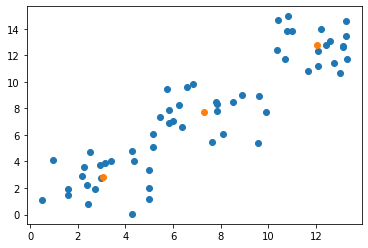

In [67]:
k = 3
n_of_iterations = 200









centroids = fit(k, n_of_iterations)


plt.figure()
plt.scatter(points[:,0],points[:,1])
plt.scatter(centroids[:,0].T,centroids[:,1].T)

### Bonus: Solution using OOP

In [66]:
class KmeansAlgo:
    def __init__(n_of_centroids: int):
        self.n_of_centroids = n_of_centroids
    
    def initialize_clusters(points: np.array) -> np.array:
        idx = np.random.shuffle(points.shape[0])                    
        required_indexes = idx[:self.n_of_centroids]                         
        return points[required_indexes]
    
    def calculate_metric(points: np.array, centroid: np.array) -> np.array:
        return np.square(norm(points-centroid, axis=1))
    
    def compute_distances(points: np.array, centroids_points: np.array) -> np.array:
        return np.asarray([calculate_metric(points, centroid) for centroid in centroids_points])
    
    def assign_clusters(distances: np.array):
        return np.argmin(distances, axis = 1)
    
    def calculate_new_clusters(X: np.array, clusters_belongs: np.array) -> np.array:
        new_clusters = []
        for cluster_id in range(n_of_clusters):
            j = np.where(clusters_belongs == cluster_id)
            points = X[j]
            new_clusters.append(np.mean(points, axis=0))

        return np.array(new_clusters)
    
    
    def fit(n_of_oterations: int):
        centroid_points = initialize_clusters(points)

        for _ in range(n_of_oterations):
            distances = compute_distances(points, centroid_points)
            cluster_belongs = np.argmin(distances, axis=0)
            centroid_points = calculate_new_clusters(points, cluster_belongs)


        return centroid_points
        

## Exercise 2 - Image Compression

In this exercise the task would be to implement simple image compression using k-means algorithm, you can use an image loacated in directory *Data\\*. You dont have to implement k-means from scratch, but you can use any available library, for example *sklearn* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html. To load the image you can use *openCv* or *matplotlib* (or anythink else)

In [24]:
from matplotlib.image import imread
from sklearn.cluster import KMeans
import numpy as np

### 1. load image

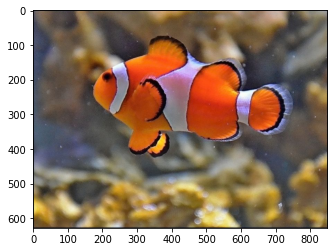

In [30]:
loaded_image = imread('Data/fish.jpg')

plt.imshow(loaded_image)
plt.show()

In [51]:
def compress_image(image: np.array, number_of_colours: int) -> np.array:
    
    image_reshaped = np.reshape(image, (image.shape[0]*image.shape[1],image.shape[2]))
    print(image_reshaped)
    kmeans = KMeans(n_clusters=number_of_colours, random_state=0).fit(image_reshaped)
    image_new = kmeans.predict(image_reshaped)
    
    print('jedem')
    print(image_new)
    print(kmeans.labels_)
    print(kmeans.cluster_centers_)
    
    
    return image


In [52]:
compress_image(loaded_image, 30)

[[13 18 37]
 [27 33 49]
 [29 35 51]
 ...
 [30 22 19]
 [25 26 31]
 [21 22 27]]
jedem
[7 4 4 ... 7 7 7]
[7 4 4 ... 7 7 7]
[[138.62156659 116.02297943  72.93717016]
 [ 90.97066952  83.77950564  77.3359673 ]
 [155.29293972 136.76197358 189.55119736]
 [243.11200522 113.47183558  24.71911701]
 [ 54.53015862  50.73938064  54.39024566]
 [202.44790289  93.22480741  19.17236013]
 [214.1641543  189.25448071 116.36142433]
 [ 31.64940481  16.08845252  19.93535494]
 [224.455081   212.44820815 168.48060874]
 [145.30734543 142.17972743 137.90890871]
 [161.3718422   62.59507781  15.53036554]
 [103.08891577  78.68930654  48.44876566]
 [112.14484081 104.71070196  92.37940161]
 [ 71.79255954  76.85061636  93.26973888]
 [192.41103118 171.58609113 234.71606715]
 [213.17063492 168.04947917  68.17261905]
 [ 71.91968061  68.55370656  67.7739951 ]
 [123.50986249 122.47211949 123.2997155 ]
 [170.50153982 106.60712714 126.72899252]
 [173.59334486 134.90442236  57.88929703]
 [191.20239366  56.6906782   14.50654605

array([[[ 13,  18,  37],
        [ 27,  33,  49],
        [ 29,  35,  51],
        ...,
        [ 41,  43,  56],
        [ 47,  50,  69],
        [ 24,  27,  46]],

       [[ 17,  22,  41],
        [ 35,  41,  57],
        [ 48,  51,  66],
        ...,
        [ 84,  86,  99],
        [ 71,  74,  93],
        [ 39,  42,  61]],

       [[ 20,  23,  40],
        [ 41,  44,  61],
        [ 61,  64,  79],
        ...,
        [123, 125, 137],
        [ 88,  91, 110],
        [ 48,  51,  70]],

       ...,

       [[ 35,  21,  18],
        [ 59,  45,  42],
        [ 81,  68,  62],
        ...,
        [ 87,  71,  56],
        [ 47,  48,  53],
        [ 33,  34,  39]],

       [[ 31,  22,  23],
        [ 44,  35,  36],
        [ 55,  45,  44],
        ...,
        [ 57,  44,  36],
        [ 37,  38,  43],
        [ 28,  29,  34]],

       [[ 19,  16,  23],
        [ 27,  22,  28],
        [ 30,  25,  29],
        ...,
        [ 30,  22,  19],
        [ 25,  26,  31],
        [ 21,  22,  27]]